In [1]:
from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection
from sklearn.manifold import Isomap
from functions import preprocess_titanic, preprocess_iris
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
SEED=42

In [3]:
def dm_pca(x, n_components):
    pca = PCA(n_components=n_components, random_state=SEED)
    res = pca.fit_transform(x)
    return res

def dm_ica(x, n_components):
    ica = FastICA(n_components=n_components, random_state=SEED)
    res = ica.fit_transform(x)
    return res

def dm_rp(x, n_components):
    rp = random_projection.GaussianRandomProjection(n_components=n_components, random_state=SEED)
    res = rp.fit_transform(x)
    return res

def dm_isomap(x, n_components, n_neighbors):
    isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
    res = isomap.fit_transform(x)
    return res

In [4]:
dm_algorithms = ["Baseline", "RP", "Isomap"]

# Titanic

In [5]:
X_train, X_test, y_train, y_test, supervised_labels = preprocess_titanic(normalized=True)

# NN

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_ma

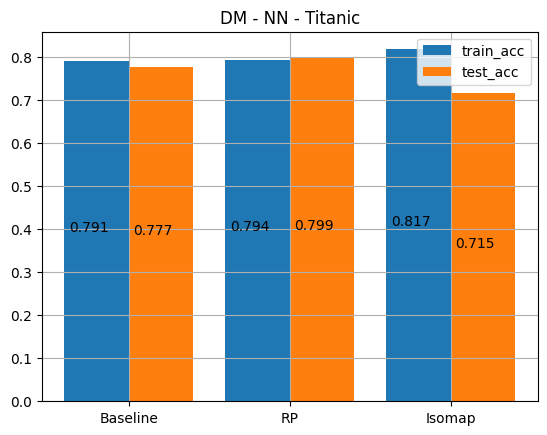

In [6]:
train_acc = {}
test_acc = {}
for z in dm_algorithms:
    if z == "Baseline":
        train_data = X_train
        test_data = X_test
    elif z == "PCA":
        train_data = dm_pca(X_train, 5)
        test_data = dm_pca(X_test, 5)
    elif z == "ICA":
        train_data = dm_ica(X_train, 3)
        test_data = dm_ica(X_test, 3)
    elif z == "RP":
        train_data = dm_rp(X_train, 3)
        test_data = dm_rp(X_test, 3)
    elif z == "Isomap":
        train_data = dm_isomap(X_train, 4, 8)
        test_data = dm_isomap(X_test, 4, 8)
    else:
        raise ValueError("Not Implemented")
    estimator = MLPClassifier(random_state=SEED, hidden_layer_sizes=25, solver="adam", batch_size=64, early_stopping=True)
    estimator.fit(train_data, y_train.reshape(-1))

    y_pred = estimator.predict(train_data)
    train_acc[z] = accuracy_score(y_train.reshape(-1), y_pred)

    y_pred = estimator.predict(test_data)
    test_acc[z] = accuracy_score(y_test.reshape(-1), y_pred)


colors = mcolors.TABLEAU_COLORS
tmp_x, tmp_height = train_acc.keys() , train_acc.values()
X_axis = np.arange(len(tmp_x))
bars = plt.bar(X_axis - 0.2,tmp_height, color=colors["tab:blue"], label="train_acc", width=0.4)
for bar in bars:
   height = bar.get_height()
   plt.annotate('%.3f' % height, xy=(bar.get_x() + 0.03,height/2))
tmp_x, tmp_height = test_acc.keys() , test_acc.values()
X_axis = np.arange(len(tmp_x))
bars = plt.bar(X_axis + 0.2,tmp_height, color=colors["tab:orange"], label="test_acc", width=0.4)
for bar in bars:
   height = bar.get_height()
   plt.annotate('%.3f' % height, xy=(bar.get_x() + 0.03,height/2))
plt.xticks(X_axis, tmp_x) 
plt.legend()
plt.grid()
plt.title("DM - NN - Titanic")
plt.show()
    

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 13 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_m

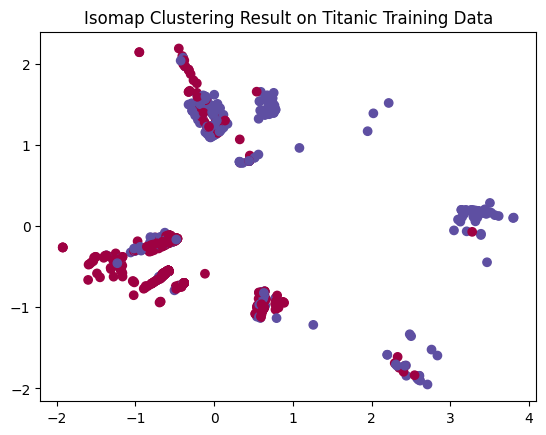

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_ma

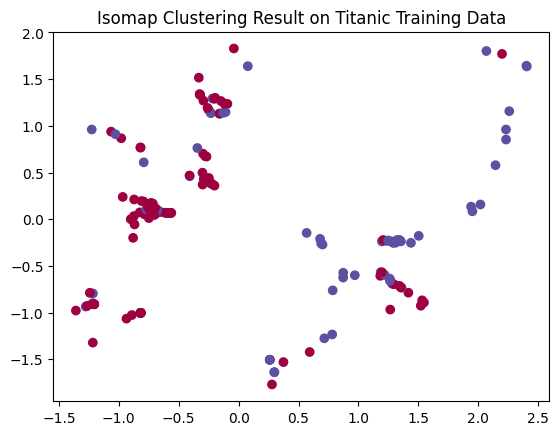

In [7]:
train_data = dm_isomap(X_train, 3, 5)
plt.title("Isomap Clustering Result on Titanic Training Data")
plt.scatter(train_data[:,0],train_data[:,1], c=y_train, cmap=plt.cm.Spectral)
plt.show()

test_data = dm_isomap(X_test, 3, 5)
plt.title("Isomap Clustering Result on Titanic Training Data")
plt.scatter(test_data[:,0],test_data[:,1], c=y_test, cmap=plt.cm.Spectral)
plt.show()

In [8]:
train_data = dm_pca(X_train, 2)
plt.title("Isomap Clustering Result on Titanic Training Data")
plt.scatter(train_data[:,0],train_data[:,1], c=y_train, cmap=plt.cm.Spectral)
plt.show()

test_data = dm_pca(X_test, 2)
plt.title("Isomap Clustering Result on Titanic Training Data")
plt.scatter(test_data[:,0],test_data[:,1], c=y_test, cmap=plt.cm.Spectral)
plt.show()